In [1]:
# Bunla şekil resim tanıtıp nerde görse o resmi tespit edecek

In [2]:
pip install bing-image-downloader

Note: you may need to restart the kernel to use updated packages.


In [3]:
from bing_image_downloader import downloader

In [5]:
downloader.download('tire',limit=10,adult_filter_off=True)   # adult filter ile uygunsuz resimleri indirip indirmeme 

[%] Downloading Images to C:\Users\ibrahim\Documents\Yapay Zeka\Day5\dataset\tire


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from https://www.bikesdirect.com/products/motobecane/images/monster_cross/images/tire.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s3-us-west-1.amazonaws.com/visual-aids/products/tires/continental/extremecontactdws06/continental_extremecontactdws06_bw_140843_vary.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://tyreflow.com/wp-content/uploads/2022/05/Oldtire.jpg
[!] Issue getting: https://tyreflow.com/wp-content/uploads/2022/05/Oldtire.jpg
[!] Error:: Remote end closed connection without response
[%] Downloading Image #3 from https://onlinetire.ae/wp-content/uploads/tyre-angle.jpeg
[!] Issue getting: https://onlinetire.ae/wp-content/uploads/tyre-angle.jpeg
[!] Error:: Remote end closed connection without response
[%] Downloading Image #3 from https://imgkit.otelz.com/placeimages/turkey/i

In [6]:
import tensorflow as tf

In [7]:
mnist=tf.keras.datasets.mnist

In [8]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()    # Yaklaşık 80000 resim indiriyor

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
import matplotlib.pyplot as plt

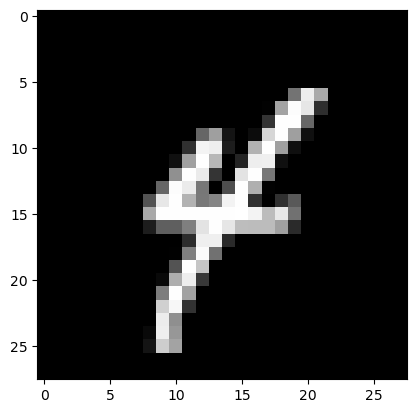

In [13]:
plt.imshow(train_images[61],cmap='gray')

In [14]:
# Resmi nasıl normalize edeceğiz?

In [15]:
train_images[0]  # Bilgisayar dilinde resimler üç boyutlu bir matris yani tensordur

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
# Normalize data

In [17]:
train_images=train_images/255.0    # Resimlerde değerler 0-255 arasında değerler alıyor 255 e bölerek normalize etmiş oluyoruz
test_images=test_images/255.0

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer,Reshape,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [20]:
model=Sequential()
model.add(InputLayer(shape=(28,28)))    # Resimlerin boyutu 28-28 bir matris
model.add(Reshape(target_shape=(28,28,1)))   
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10)) # 10 fakli cevap classification 0-9 a kadar olan rakamlar
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
model.fit(train_images,train_labels, validation_split=.10, epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8524 - loss: 0.5365 - val_accuracy: 0.9582 - val_loss: 0.1618
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9470 - loss: 0.1793 - val_accuracy: 0.9738 - val_loss: 0.0975
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9687 - loss: 0.1125 - val_accuracy: 0.9782 - val_loss: 0.0787
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9758 - loss: 0.0853 - val_accuracy: 0.9830 - val_loss: 0.0662
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9809 - loss: 0.0676 - val_accuracy: 0.9840 - val_loss: 0.0616
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9833 - loss: 0.0577 - val_accuracy: 0.9810 - val_loss: 0.0600
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9844 - loss: 0.0513 - val_accuracy: 0.9825 - val_loss: 0.0622
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9866 - loss: 0

In [22]:
loss,accuracy=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.0765


In [23]:
accuracy

0.9796000123023987

In [24]:
model.save('benimmodel.h5')

In [26]:
!pip install torch torchvision

     -------------------------------------- 216.0/216.0 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 6.3/6.3 MB 1.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Verilerin normalizasyonu ve yüklenmesi
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Modelin tanımlanması
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=3)  # Aktivasyon burada yok
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(12 * 13 * 13, 10)  # 28x28 -> 12x26 -> 12x13

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Aktivasyon burada uygulanıyor
        x = self.pool(x)
        x = x.view(-1, 12 * 13 * 13)  # Düzleştir
        x = self.fc1(x)
        return x

# Model ve optimizer tanımlanması
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Modelin eğitilmesi
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()  # Gradients sıfırlanıyor
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Modelin test edilmesi
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

# Modelin kaydedilmesi
torch.save(model.state_dict(), 'benimmodel.pth')

Epoch [1/10], Loss: 0.1070
Epoch [2/10], Loss: 0.0441
Epoch [3/10], Loss: 0.0144
Epoch [4/10], Loss: 0.0620
Epoch [5/10], Loss: 0.1411
Epoch [6/10], Loss: 0.0709
Epoch [7/10], Loss: 0.0361
Epoch [8/10], Loss: 0.0020
Epoch [9/10], Loss: 0.0047
Epoch [10/10], Loss: 0.0375
Accuracy of the model on the test images: 98.07%


In [29]:
# Burda yaptığımız şey modeli eğittik yeni bir el yazması yazarsak yüzde kaç doğrulukla bunu tanıyacak bunu belirledik.
# Keras yazdığımız kodu poe de bunu torch olarak yaz diyerek çevirdik aynı kodu hem keras hemde torch ile yazmış olduk.
# Bunlar DeepLearning modelleridir. Kreas ve Torch